In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
df=pd.read_csv('train.csv')

In [47]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Data Preprocessing

In [48]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [49]:
df["text"] = df["title"] + " " + df["text"]

In [50]:
df.dropna(subset=['text'], inplace=True)

In [51]:
df.drop(columns=['id', 'author', 'title'], inplace=True)

In [52]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Why the Trut...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [53]:
df.text.loc[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House In

In [70]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [71]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

#### For Embedding Layer Onehot Representation

In [72]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [73]:
### Vocabulary size
vocab_size=20000

In [74]:
onehot_repr=[one_hot(words,vocb_size)for words in corpus]

### Embedding Representation

In [24]:
sent_length=100
embedding_vector_features_dimention=100

In [77]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [78]:
embedded_docs[3]

array([10690, 18807,  9454,  9841,  6733,  9958, 17969, 11986, 17802,
        4028, 13915,  3174, 19434,   313, 13086,  5570, 12597, 10624,
        3931,  4191,  9203, 12652, 19133, 11929,  2264,  7677,  4600,
        4028, 18949,  1404, 17969,  9470,  9245, 17649,  2264, 15819,
        9366,  2979,   654, 10690, 15292, 13957,  4706,  4913, 16615,
       10690, 18807, 19434, 15314,  1455,  6722,  3428, 19681, 17969,
       18897, 17512, 12458, 16984,  9938,  7807,  4521, 17301, 18256,
        6759,  9825, 19434, 13544, 17894, 18949,  2264, 10702, 16414,
         313, 11404, 13544, 10690,  5993, 17969, 10624,  8378,  5687,
       15678, 19434,  3019,  2264, 11404,  7807, 14892, 18949, 19434,
        2686,  6790,  4409, 13278, 17969, 11559, 15681, 15678, 16530,
       18495], dtype=int32)

In [79]:
embedded_docs.shape

(20203, 100)

### Build Model

In [80]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout

In [81]:
model = tf.keras.models.Sequential([
    Embedding(vocab_size, embedding_vector_features_dimention, input_length=sent_length),
    LSTM(128, return_sequences=False), # Adding a 128-unit LSTM layer
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2117377 (8.08 MB)
Trainable params: 2117377 (8.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Compile the model with hyperparameter tuning
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
len(embedded_docs),y.shape

(20203, (20203,))

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(embedded_docs, df['label'], test_size=0.3, random_state=42)

### Model Training

In [91]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,batch_size =64)

Epoch 1/7
221/221 [==============================] - 27s 119ms/step - loss: 0.3136 - accuracy: 0.8670 - val_loss: 0.2260 - val_accuracy: 0.9119
Epoch 2/7
221/221 [==============================] - 26s 120ms/step - loss: 0.1133 - accuracy: 0.9621 - val_loss: 0.2211 - val_accuracy: 0.9228
Epoch 3/7
221/221 [==============================] - 29s 131ms/step - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.2510 - val_accuracy: 0.9206
Epoch 4/7
221/221 [==============================] - 27s 123ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.3034 - val_accuracy: 0.9140
Epoch 5/7
221/221 [==============================] - 27s 123ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.3343 - val_accuracy: 0.9107
Epoch 6/7
221/221 [==============================] - 28s 126ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.3590 - val_accuracy: 0.9102
Epoch 7/7
221/221 [==============================] - 29s 129ms/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.3851 - val_accuracy:

### Plotting Training & Validation Loss, Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


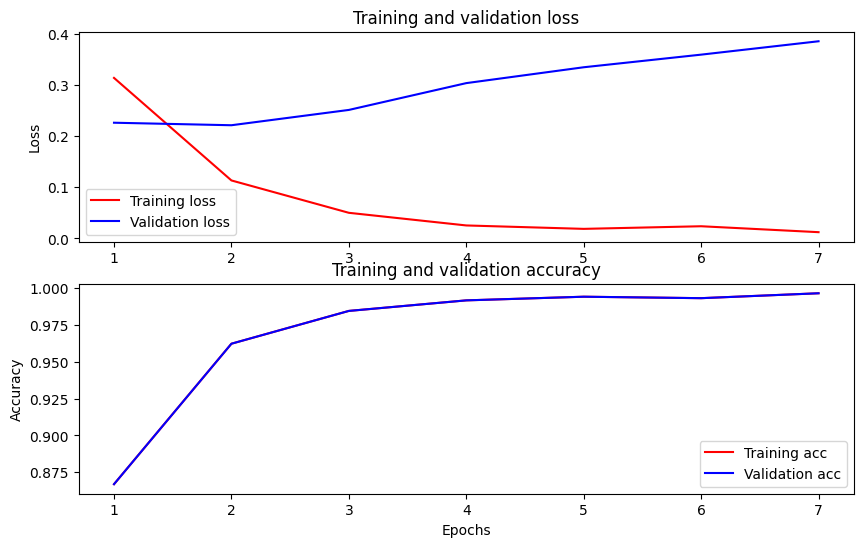

In [93]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### Performance Metrics And Accuracy

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
y_pred = model.predict(X_test)
y_predicted = y_pred.flatten()

190/190 [==============================] - 5s 24ms/step


In [96]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, ..., 1, 1, 0])

In [97]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2819,  310],
       [ 211, 2721]])

In [98]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3129
           1       0.90      0.93      0.91      2932

    accuracy                           0.91      6061
   macro avg       0.91      0.91      0.91      6061
weighted avg       0.91      0.91      0.91      6061



### Saved Model

In [162]:
dataset_name = 'fake_news'
saved_model_path = './{}_model'.format(dataset_name.replace('/', '_'))

model.save(saved_model_path, include_optimizer=False)

INFO:tensorflow:Assets written to: ./fake_news_model/assets


INFO:tensorflow:Assets written to: ./fake_news_model/assets


In [99]:
reloaded_model = tf.keras.models.load_model('./fake_news_model')

### Prediction Interface

In [100]:
ps = PorterStemmer()

# Preprocess the input sentence
def preprocess_input_sentence(sentence):
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [ps.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    return sentence

# Convert input sentence to one-hot representation
def get_one_hot_representation(sentence, vocab_size):
    sentence = preprocess_input_sentence(sentence)
    onehot_repr = [one_hot(sentence, vocab_size)]
    return onehot_repr

# Pad the one-hot representation
def pad_input_sequence(onehot_repr, max_length):
    padded_sequence = pad_sequences(onehot_repr, padding='pre', maxlen=max_length)
    return padded_sequence

# Input sentence
input_sentence = input("Enter your statement here: ")

# Tokenize and pad the input sentence
onehot_repr = get_one_hot_representation(input_sentence, vocb_size)
padded_sequence = pad_input_sequence(onehot_repr, sent_length)

# Get the model's prediction score
prediction_score = model.predict(padded_sequence)
print("Prediction Score:", prediction_score)

# Define the threshold for classifying as fake
threshold = 0.5

if prediction_score > threshold:
    print("This Message is --> FAKE")
else:
    print("This Message is --> REAL")

Enter your statement here: SIX chances win CASH From 100 20,000 pounds txt CSH11 send 87575 Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info
1/1 [==============================] - 0s 21ms/step
Prediction Score: [[0.999985]]
This Message is --> FAKE


### Kaggel Submission 

In [202]:
test=pd.read_csv('test.csv')

In [203]:
submission=pd.read_csv('submit.csv')

In [204]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [205]:
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [209]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [210]:
def fill_data(data):
    data["title"] = data["title"].fillna("No Title")
    data["text"] = data["text"].fillna("No text")
    return data

In [211]:
test = fill_data(test)

In [212]:
test["text"] = test["title"] + " " + test["text"]

In [213]:
test.isnull().sum()

id          0
title       0
author    503
text        0
dtype: int64

In [216]:
test.drop(columns=['id', 'author', 'title'], inplace=True)

In [217]:
test.head()

,text
0,"Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...
3,"Tim Tebow Will Attempt Another Comeback, This ..."
4,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...


In [218]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [219]:
onehot_repr=[one_hot(words,vocb_size)for words in corpus]

In [220]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [223]:
prediction = model.predict(embedded_docs)

163/163 [==============================] - 0s 517us/step


In [224]:
y_predicted = prediction.flatten()

In [225]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 1, ..., 0, 1, 0])

In [226]:
submission["label_2"] = y_predicted

In [240]:
submission.sample(5)

,id,label,label_2
1213,22013,0,0
3995,24795,1,1
3524,24324,0,0
3477,24277,1,1
589,21389,1,1
